In [1]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
cctv_df = pd.read_csv('./data/cctv/무인교통단속카메라현황.csv', encoding='cp949')
accident_df = pd.read_csv('./data/교통사고/경기도연도별교통사고데이터.csv')

In [ ]:
print(cctv_df.shape)
print(cctv_df.info())

(11656, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   무인교통단속카메라관리번호  11656 non-null  object 
 1   시도명            11656 non-null  object 
 2   시군명            11656 non-null  object 
 3   도로종류           11656 non-null  object 
 4   도로노선번호         2780 non-null   object 
 5   도로노선명          11656 non-null  object 
 6   도로노선방향         11656 non-null  int64  
 7   소재지도로명주소       5202 non-null   object 
 8   소재지지번주소        11638 non-null  object 
 9   위도             11656 non-null  float64
 10  경도             11656 non-null  float64
 11  설치장소           11656 non-null  object 
 12  단속구분           11656 non-null  object 
 13  제한속도           11656 non-null  int64  
 14  보호구역구분         8079 non-null   float64
 15  설치연도           11042 non-null  float64
 16  관리기관명          11656 non-null  object 
 17  관리기관전화번호       11656 non-null  object 

In [10]:
cctv_df.head()

,무인교통단속카메라관리번호,시도명,시군명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,관리기관명,관리기관전화번호,데이터기준일자
0,G2403,경기도,가평군,일반국도,75,호반로,3,NaN,경기도 가평군 가평읍 달전리 452-10,37.814140,127.514933,농협 앞(남이섬-&amp;gt;가평경찰서),1,30,99.0,2018.0,경기도북부경찰청,031-961-2651,2025-03-28
1,F9916,경기도,가평군,일반국도,46,경춘로,1,NaN,경기도 가평군 청평면 대성리 758,37.697290,127.384018,원대성리 삼거리앞(청평터미널→대성리역),2,70,99.0,2017.0,경기도북부경찰청,031-961-2651,2025-03-28
2,J1474,경기도,가평군,시도,NaN,북한강변로,2,NaN,경기도 가평군 가평읍 달전리 247-6,37.810489,127.517459,가시머리민물매운탕 노인보호구역(달전교차로→자라섬),1,30,1.0,2022.0,경기도북부경찰청,031-961-2651,2025-03-28
3,H5793,경기도,가평군,지방도,86,한서로,3,경기도 가평군 설악면 한서로 233,경기도 가평군 설악면 위곡리 718-1,37.669875,127.515358,미원초교 위곡분교 어린이보호구역(홍천→설악면),2,30,2.0,2021.0,경기도북부경찰청,031-961-2651,2025-03-28
4,H4870,경기도,가평군,시도,NaN,문화로,3,NaN,경기도 가평군 가평읍 읍내리 549-1,37.829499,127.507158,한석봉도서관(가평초교→가평역),1,30,99.0,2020.0,경기도북부경찰청,031-961-2651,2025-03-28


In [13]:
jijace_names = ['수원시', '고양시', '화성시', '용인시']

In [23]:
filtered_cctv_df = cctv_df[cctv_df['시군명'].isin(jijace_names)]

In [24]:
sigun_counts = filtered_cctv_df['시군명'].value_counts().reset_index()
sigun_counts.columns = ['시군명', '카메라수']

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_18812\2077103488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sigun_counts, x='시군명', y='카메라수', palette='viridis')


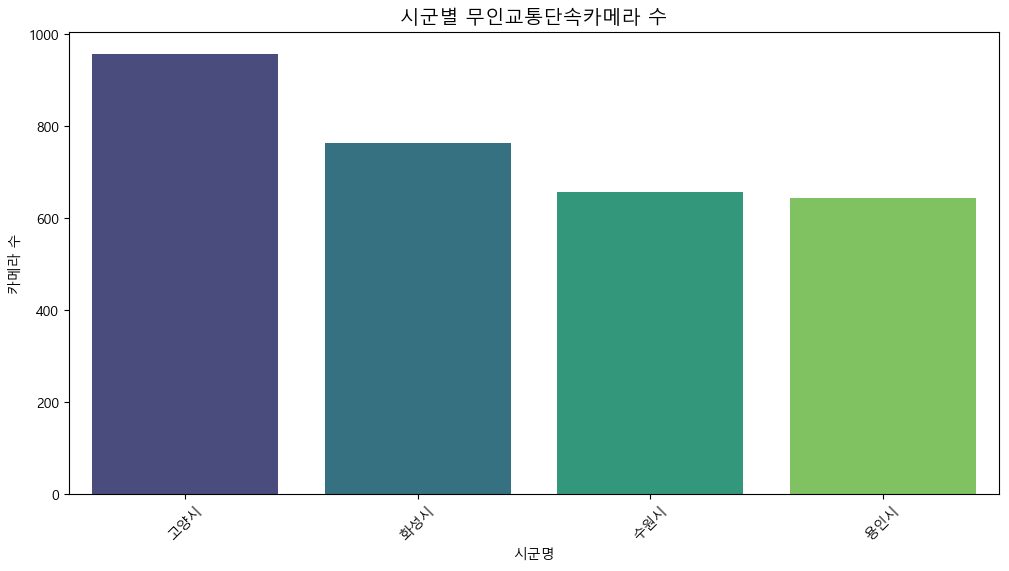

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=sigun_counts, x='시군명', y='카메라수', palette='viridis')
plt.xticks(rotation=45)
plt.title('시군별 무인교통단속카메라 수', fontsize=14)
plt.xlabel('시군명')
plt.ylabel('카메라 수')
plt.show()

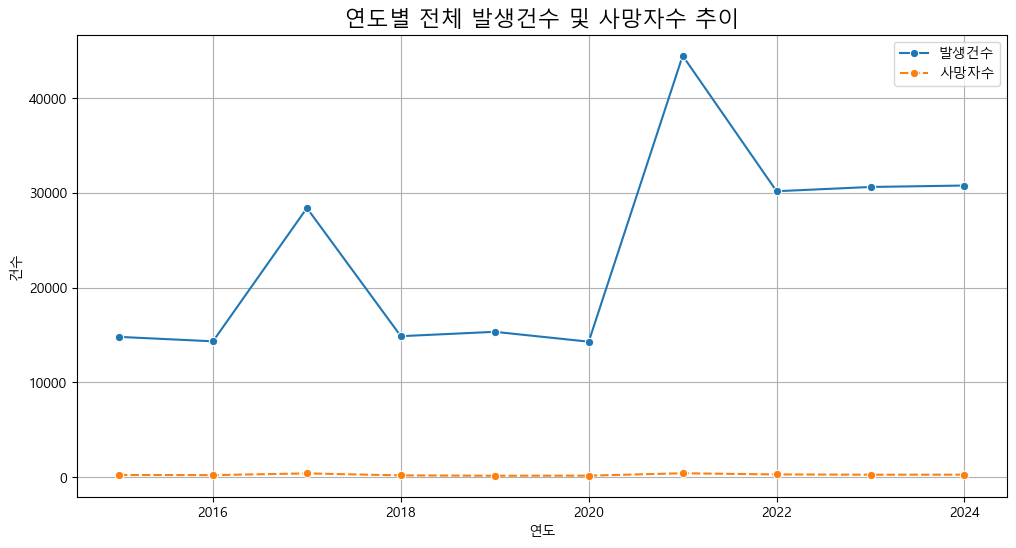

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_18812\2642924745.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')


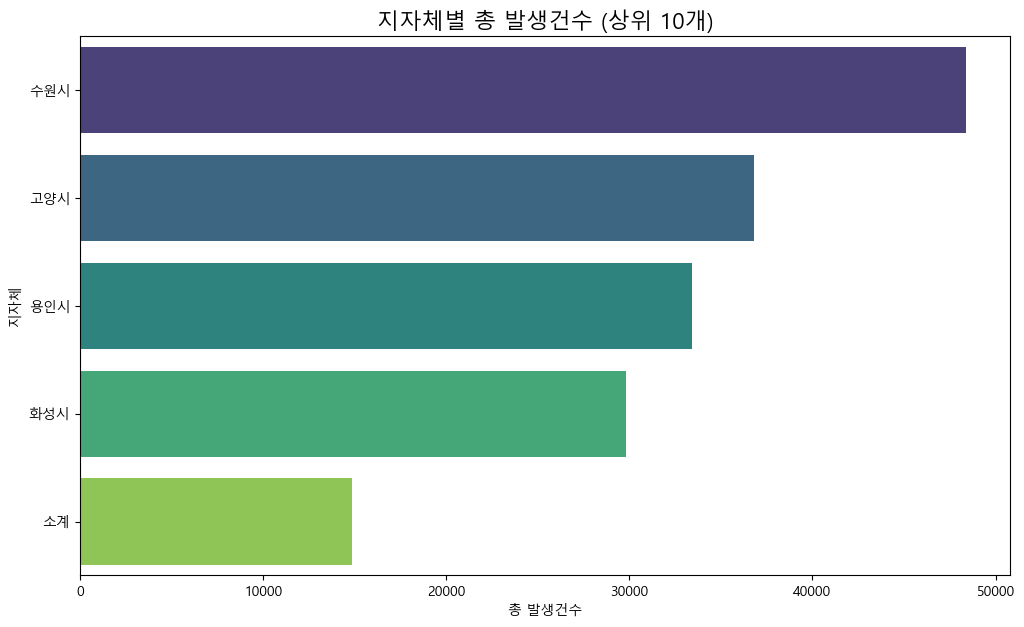

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_18812\2642924745.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_violations.values, y=top_10_violations.index, palette='rocket')


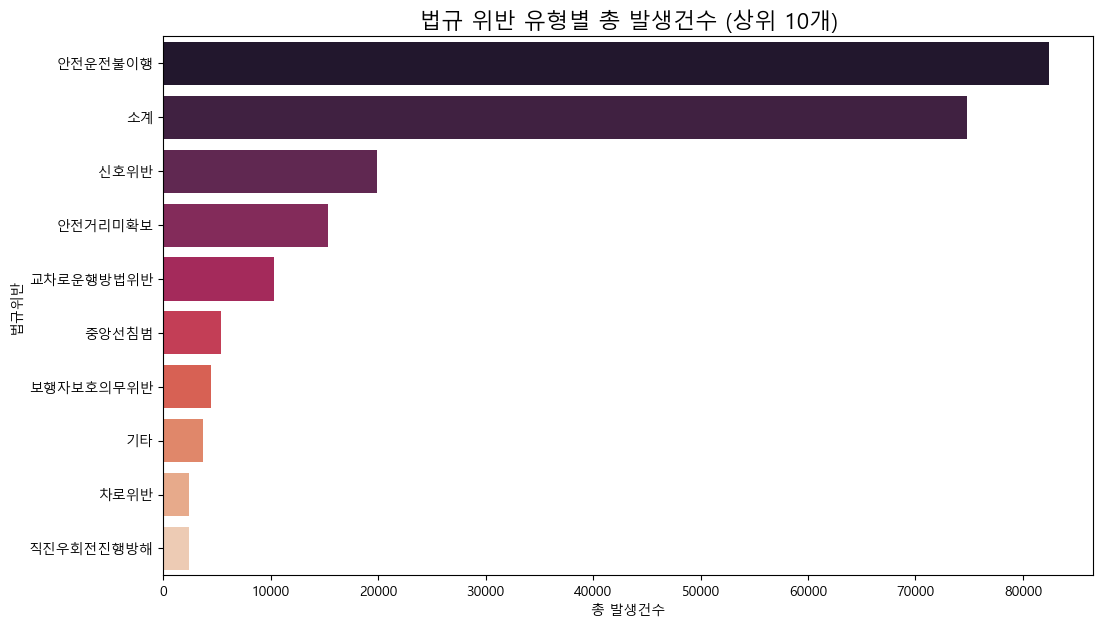

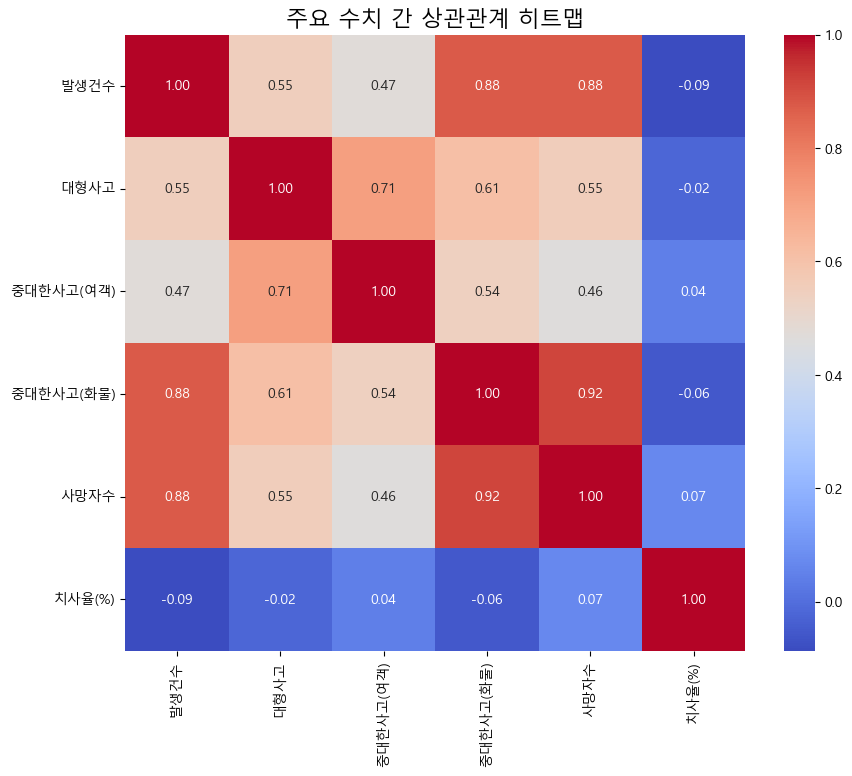

In [19]:

if not accident_df.empty:
    # --- 1. 연도별 전체 사고 발생건수 및 사망자수 추이 ---
    yearly_trends = accident_df.groupby('연도')[['발생건수', '사망자수']].sum()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=yearly_trends, marker='o')
    plt.title('연도별 전체 발생건수 및 사망자수 추이', fontsize=16)
    plt.ylabel('건수')
    plt.grid(True)
    plt.show()

    # --- 2. 지자체별 총 발생건수 (상위 10개) ---
    top_10_cities = accident_df.groupby('지자체')['발생건수'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
    plt.title('지자체별 총 발생건수 (상위 10개)', fontsize=16)
    plt.xlabel('총 발생건수')
    plt.show()

    # --- 3. 법규 위반 유형별 총 발생건수 (상위 10개) ---
    top_10_violations = accident_df.groupby('법규위반')['발생건수'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_violations.values, y=top_10_violations.index, palette='rocket')
    plt.title('법규 위반 유형별 총 발생건수 (상위 10개)', fontsize=16)
    plt.xlabel('총 발생건수')
    plt.show()

    # --- 4. 주요 수치 간의 상관관계 (히트맵) ---
    corr_df = accident_df[['발생건수', '대형사고', '중대한사고(여객)', '중대한사고(화물)', '사망자수', '치사율(%)']]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('주요 수치 간 상관관계 히트맵', fontsize=16)
    plt.show()

In [26]:
# 시군별 연도별 카메라수 집계
gyeonggi_df = filtered_cctv_df.copy()
gyeonggi_df = gyeonggi_df.dropna(subset=['설치연도'])
gyeonggi_df['설치연도'] = gyeonggi_df['설치연도'].astype(int)

In [27]:
yearly_counts = (
    gyeonggi_df
    .groupby(['시군명', '설치연도'])
    .size()
    .reset_index(name='카메라수')
)

yearly_counts

,시군명,설치연도,카메라수
0,고양시,2005,2
1,고양시,2006,54
2,고양시,2007,23
3,고양시,2008,38
4,고양시,2009,22
5,고양시,2010,40
6,고양시,2011,43
7,고양시,2012,14
8,고양시,2013,25
9,고양시,2014,23


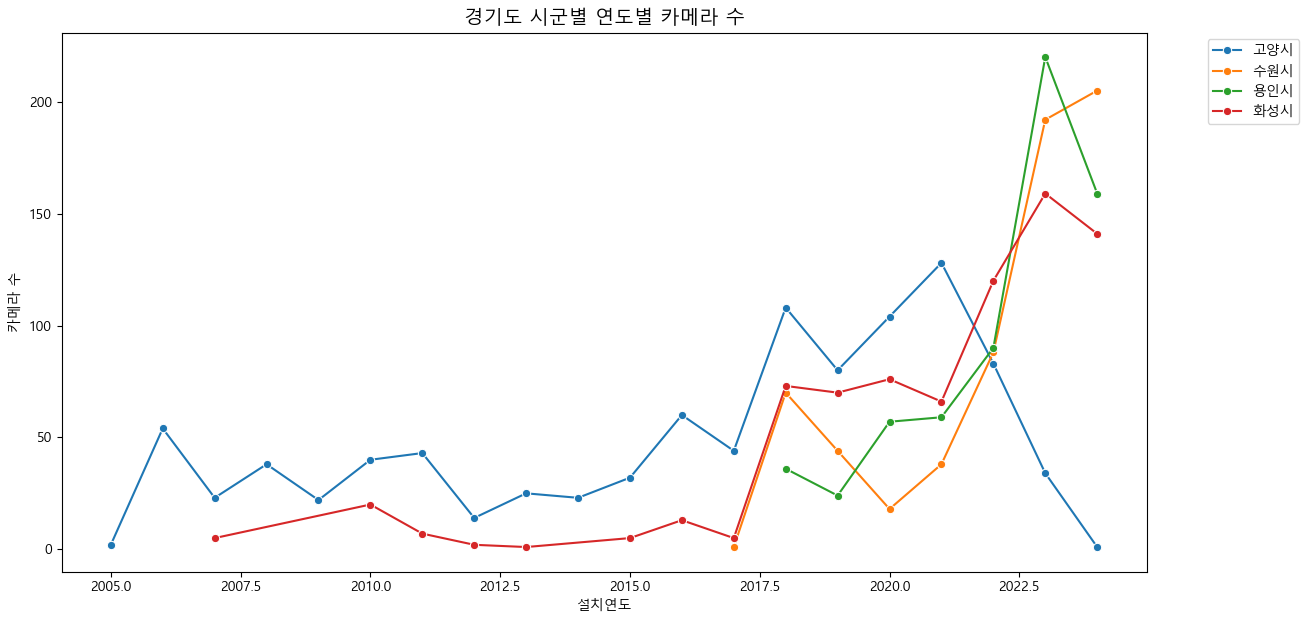

In [28]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_counts, x='설치연도', y='카메라수', hue='시군명', marker='o')
plt.title('경기도 시군별 연도별 카메라 수', fontsize=14)
plt.xlabel('설치연도')
plt.ylabel('카메라 수')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [35]:
# --- 1. 3개 기준으로 데이터 집계 ---
# 지자체, 연도, 법규위반별로 발생건수의 합계를 구합니다.
violation_by_city_year = accident_df.groupby(['지자체', '연도', '법규위반'])['발생건수'].sum().reset_index()

print("\n--- 지자체별/연도별 법규위반 발생건수 요약 테이블 ---")
print(violation_by_city_year)


--- 지자체별/연도별 법규위반 발생건수 요약 테이블 ---
     지자체    연도       법규위반  발생건수
0    고양시  2015         과속    10
1    고양시  2015  교차로운행방법위반   291
2    고양시  2015         기타   122
3    고양시  2015  보행자보호의무위반   104
4    고양시  2015       불법유턴    52
..   ...   ...        ...   ...
451  화성시  2024    안전거리미확보   385
452  화성시  2024    안전운전불이행  2104
453  화성시  2024      중앙선침범   127
454  화성시  2024  직진우회전진행방해    44
455  화성시  2024       차로위반    32

[456 rows x 4 columns]


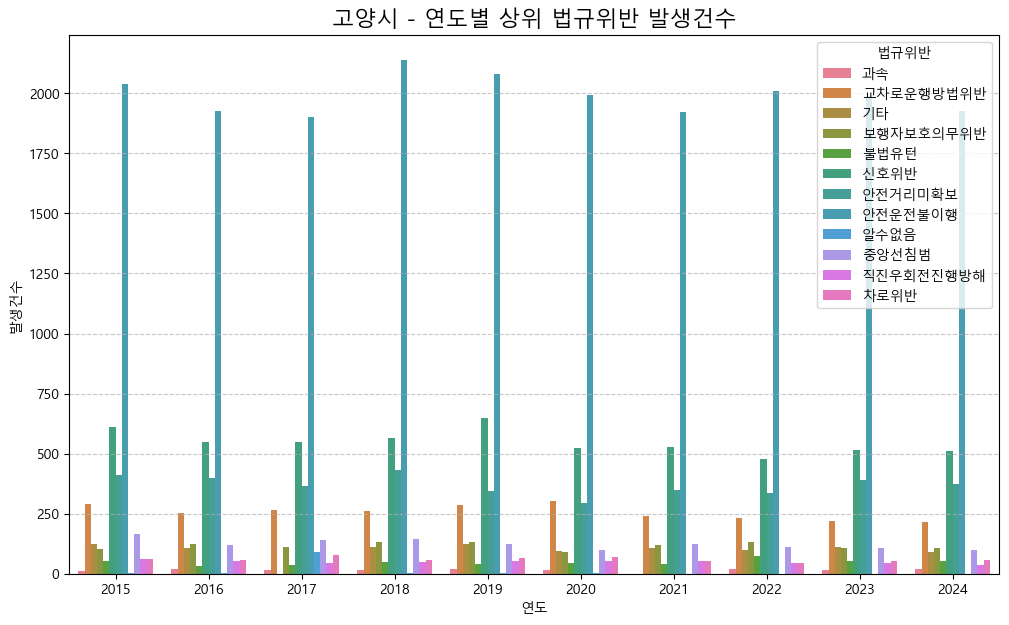

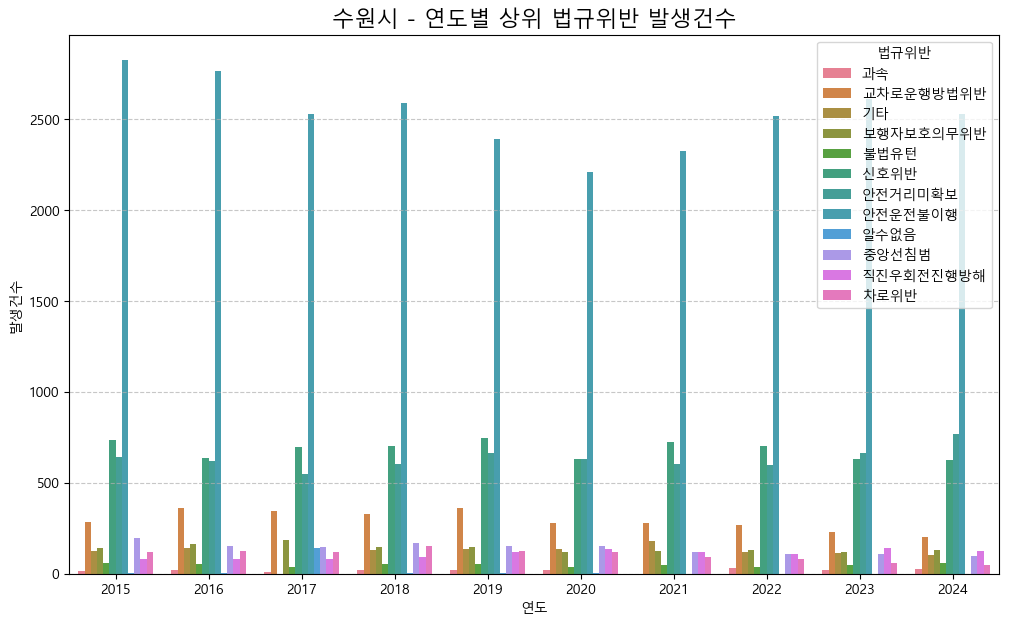

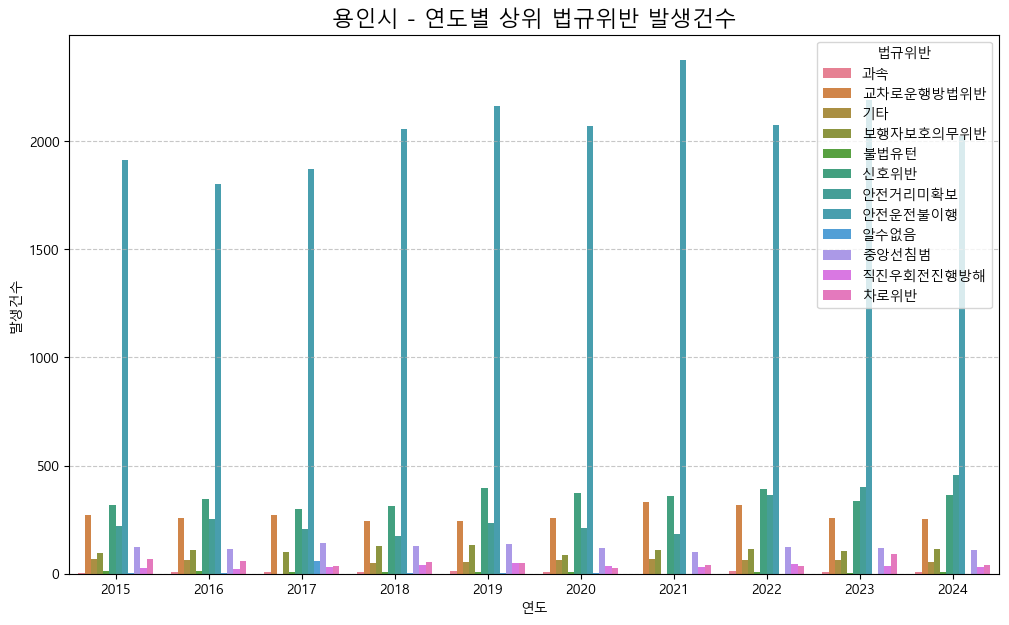

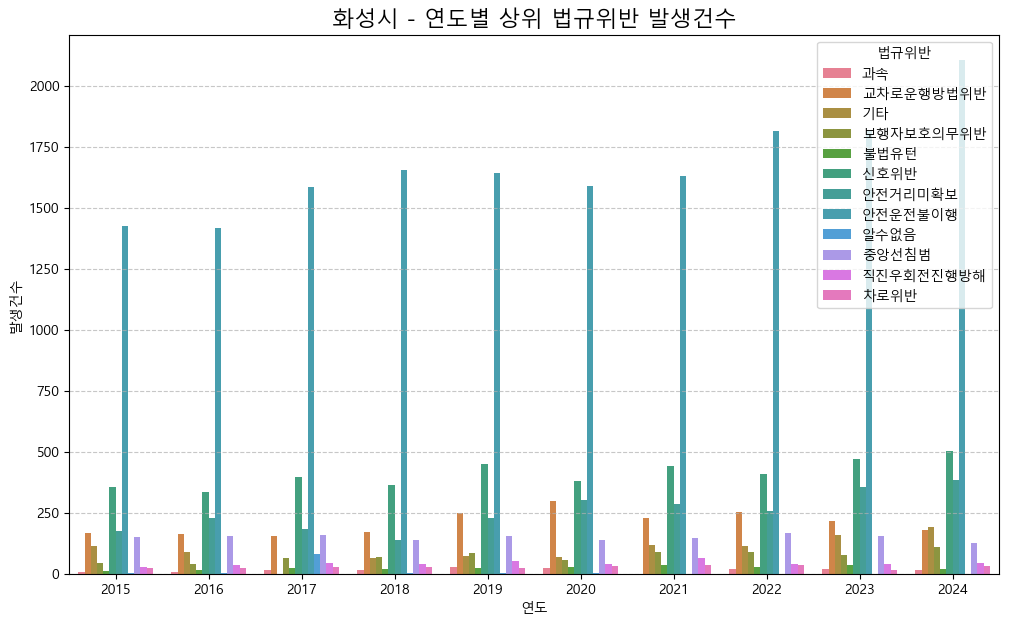

In [36]:
# --- ★★★ 시각화 코드 수정 (개별 그래프로 표시) ★★★ ---

# 1. 데이터에 포함된 모든 고유한 지자체 목록을 가져옵니다.
unique_cities = violation_by_city_year['지자체'].unique()

# 2. 각 지자체에 대해 for 루프를 실행합니다.
for city in unique_cities:
    
    # 3. 현재 지자체에 해당하는 데이터만 필터링합니다.
    city_data = violation_by_city_year[violation_by_city_year['지자체'] == city]
    
    # 4. 새로운 그래프 창을 생성합니다. (이 코드로 인해 각 그래프가 분리됩니다)
    plt.figure(figsize=(12, 7))
    
    # 5. 현재 지자체의 데이터로 막대그래프를 그립니다.
    sns.barplot(
        data=city_data, 

        
        x='연도', 
        y='발생건수', 
        hue='법규위반'
    )
    
    # 6. 각 그래프에 맞는 제목과 라벨을 추가합니다.
    plt.title(f'{city} - 연도별 상위 법규위반 발생건수', fontsize=16)
    plt.xlabel('연도')
    plt.ylabel('발생건수')
    plt.legend(title='법규위반')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 7. 완성된 그래프를 화면에 표시합니다.
    plt.show()


--- 연도별 CCTV 및 사고 데이터 통합 결과 ---
        CCTV설치수   발생건수  사망자수
연도                          
2015.0       37  14795   217
2016.0       73  14325   200
2017.0       50  28398   382
2018.0      287  14868   173
2019.0      218  15329   137
2020.0      255  14287   146
2021.0      291  44475   396
2022.0      381  30170   274
2023.0      605  30620   244
2024.0      506  30772   248


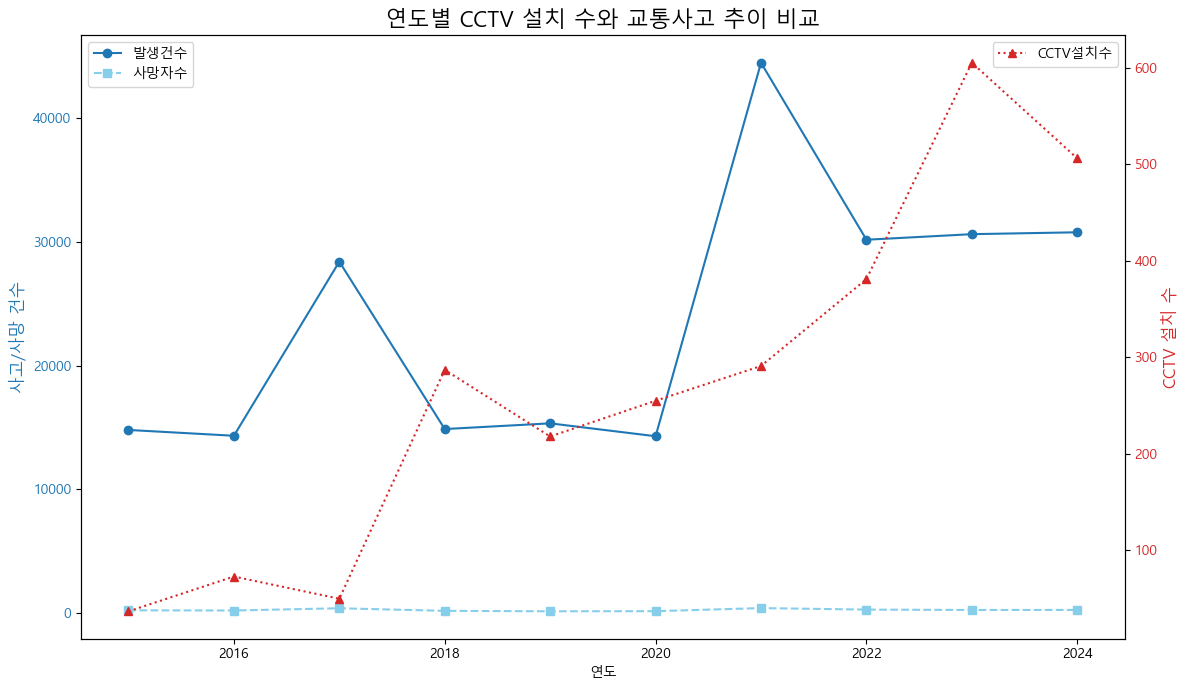

In [39]:
# --- 2. 데이터 요약 ---

# 2-1. 연도별 CCTV 설치 수 집계
# 각 '설치년도'별로 행의 개수를 세어 'CCTV설치수'를 구합니다.
cctv_yearly_counts = filtered_cctv_df['설치연도'].value_counts().sort_index().rename_axis('연도').reset_index(name='CCTV설치수')
cctv_yearly_counts.set_index('연도', inplace=True)

# 2-2. 연도별 사고 데이터 집계
accident_yearly_sum = accident_df.groupby('연도')[['발생건수', '사망자수']].sum()

# --- 3. 두 데이터프레임 병합 ---
# '연도'를 기준으로 두 데이터를 합칩니다.
combined_df = pd.merge(cctv_yearly_counts, accident_yearly_sum, on='연도', how='inner')

print("--- 연도별 CCTV 및 사고 데이터 통합 결과 ---")
print(combined_df)


# --- 4. 이중 축(Dual-axis) 그래프로 시각화 ---
fig, ax1 = plt.subplots(figsize=(12, 7))

# 첫 번째 Y축 (왼쪽): 사고 관련 데이터 (파란색 계열)
color_acc = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('사고/사망 건수', color=color_acc, fontsize=12)
ax1.plot(combined_df.index, combined_df['발생건수'], color=color_acc, marker='o', label='발생건수')
ax1.plot(combined_df.index, combined_df['사망자수'], color='skyblue', marker='s', linestyle='--', label='사망자수')
ax1.tick_params(axis='y', labelcolor=color_acc)
ax1.legend(loc='upper left')

# 두 번째 Y축 (오른쪽): CCTV 관련 데이터 (빨간색)
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 축 생성
color_cctv = 'tab:red'
ax2.set_ylabel('CCTV 설치 수', color=color_cctv, fontsize=12)
ax2.plot(combined_df.index, combined_df['CCTV설치수'], color=color_cctv, marker='^', linestyle=':', label='CCTV설치수')
ax2.tick_params(axis='y', labelcolor=color_cctv)
ax2.legend(loc='upper right')

# 그래프 제목 및 레이아웃 설정
plt.title('연도별 CCTV 설치 수와 교통사고 추이 비교', fontsize=16)
fig.tight_layout()  # 레이아웃 자동 조절
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()
